# Assignment 8
Halka Hanna


In [61]:
from neuralforecast.models import RNN, NHITS, LSTM, BiTCN, KAN

from neuralforecast import NeuralForecast

import numpy as np
import pandas as pd
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
from cycler import cycler
from fpppy.utils import plot_series

import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*FigureCanvasAgg is non-interactive.*"
)

In [75]:
def simpl_plot(train, val, year, title):
    y_train = train
    y_val = val

    fig, ax = plt.subplots(figsize=(12, 3))
    y_train.plot(ax=ax, label='Training Set', title=f'{title} test/val split', color='#3A92E4')
    y_val.plot(ax=ax, label='Val Set', color='#3AE48C')
    ax.axvline(year, color='black', ls='--')
    ax.legend(['Training Set', 'Val Set'])
    plt.show()
    return y_val

In [78]:
def models(train, pred_len, input_size, freq):
    models = [
      NHITS(h=pred_len, input_size=input_size, scaler_type="robust"),
      RNN(h=pred_len, input_size=input_size, scaler_type="robust"),
      LSTM(h=pred_len, input_size=input_size, scaler_type="robust"),
      BiTCN(h=pred_len, input_size=input_size, scaler_type="robust"),
      KAN(h=pred_len, input_size=input_size, scaler_type="robust"),
    ]

    nf = NeuralForecast(models=models, freq=freq)
    nf.fit(df=train)
    forecasts = nf.predict()
    return forecasts

In [85]:
def models_ped_plot(true_value, model, name):
    fig, ax = plt.subplots(figsize=(12, 3))

    true_value.plot(ax=ax, label='True values', title=f'Model {name} predicts', color='#3AE48C')
    model.plot(ax=ax, label=f'{name} model', color='red')
    ax.legend(['True values', f'{name} model'])
    plt.grid(False)
    plt.show()

---
## Daily Temperature

In [62]:
tempt = pd.read_csv('../data/daily_tempt.csv')
tempt['data_ind'] = tempt['Date']
tempt = tempt.set_index('data_ind')
tempt.index = pd.to_datetime(tempt.index)

train_df = tempt.loc[tempt.index < '1988-01-01']
val_df = tempt.loc[tempt.index >= '1988-01-01']

train = train_df[['mean-tempt']].reset_index()
train['unique_id'] = 'tempt'
train.rename(columns={'data_ind': 'ds', 'mean-tempt': 'y'}, inplace=True)
train_tempt = train[['unique_id', 'ds', 'y']]

val = val_df[['mean-tempt']].reset_index()
val['unique_id'] = 'tempt'
val.rename(columns={'data_ind': 'ds', 'mean-tempt': 'y'}, inplace=True)
val_tempt = val[['unique_id', 'ds', 'y']]

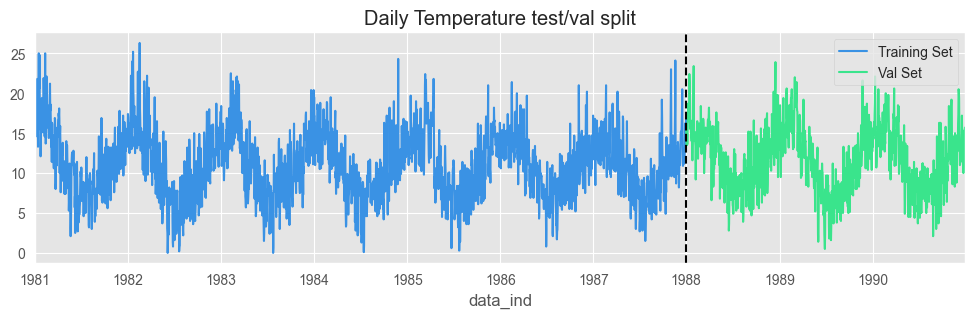

In [77]:
y_val = simpl_plot(train_df['mean-tempt'], val_df['mean-tempt'], '1988-01-01', 'Daily Temperature')

In [65]:
forecasts = models(train_tempt, len(val_tempt['y']), 365, 'D')

Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name         | Type          | Params | Mode  | FLOPs
---------------------------------------------------------------
0 | loss         | MAE           | 0      | train | 0    
1 | padder_train | ConstantPad1d | 0      | train | 0    
2 | scaler       | TemporalNorm  | 0      | train | 0    
3 | blocks       | ModuleList    | 4.3 M  | train | 0    
---------------------------------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.142    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name              | Type          | Params | Mode  | FLOPs
--------------------------------------------------------------------
0 | loss              | MAE           | 0      | train | 0    
1 | padder_train      | ConstantPad1d | 0      | train | 0    
2 | scaler            | TemporalNorm  | 0      | train | 0    
3 | hist_encoder      | RNN           | 49.8 K | train | 0    
4 | mlp_decoder       | MLP           | 16.6 K | train | 0    
5 | upsample_sequence | Linear        | 401 K  | train | 0    
--------------------------------------------------------------------
467 K     Trainable params
0         Non-trainable params
467 K     Total params
1.870     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name              | Type          | Params | Mode  | FLOPs
--------------------------------------------------------------------
0 | loss              | MAE           | 0      | train | 0    
1 | padder_train      | ConstantPad1d | 0      | train | 0    
2 | scaler            | TemporalNorm  | 0      | train | 0    
3 | hist_encoder      | LSTM          | 199 K  | train | 0    
4 | mlp_decoder       | MLP           | 16.6 K | train | 0    
5 | upsample_sequence | Linear        | 401 K  | train | 0    
--------------------------------------------------------------------
616 K     Trainable params
0         Non-trainable params
616 K     Total params
2.468     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name          | Type          | Params | Mode  | FLOPs
----------------------------------------------------------------
0 | loss          | MAE           | 0      | train | 0    
1 | padder_train  | ConstantPad1d | 0      | train | 0    
2 | scaler        | TemporalNorm  | 0      | train | 0    
3 | lin_hist      | Linear        | 32     | train | 0    
4 | drop_hist     | Dropout       | 0      | train | 0    
5 | net_bwd       | Sequential    | 9.6 K  | train | 0    
6 | drop_temporal | Dropout       | 0      | train | 0    
7 | temporal_lin1 | Linear        | 5.9 K  | train | 0    
8 | temporal_lin2 | Linear        | 18.6 K | train | 0    
9 | output_lin    | Linear        | 17     | train | 0    
----------------------------------------------------------------
34.2 K    Trainable params
0         Non-trainable params
34.2 K    Total params
0.137     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name         | Type          | Params | Mode  | FLOPs
---------------------------------------------------------------
0 | loss         | MAE           | 0      | train | 0    
1 | padder_train | ConstantPad1d | 0      | train | 0    
2 | scaler       | TemporalNorm  | 0      | train | 0    
3 | layers       | ModuleList    | 7.5 M  | train | 0    
---------------------------------------------------------------
7.5 M     Trainable params
0         Non-trainable params
7.5 M     Total params
29.921    Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

In [71]:
NHITS = forecasts[['ds', 'NHITS']]
NHITS = NHITS.set_index('ds')
RNN = forecasts[['ds', 'RNN']]
RNN = RNN.set_index('ds')
LSTM = forecasts[['ds', 'LSTM']]
LSTM = LSTM.set_index('ds')
BiTCN = forecasts[['ds', 'BiTCN']]
BiTCN = BiTCN.set_index('ds')
KAN = forecasts[['ds', 'KAN']]
KAN = KAN.set_index('ds')

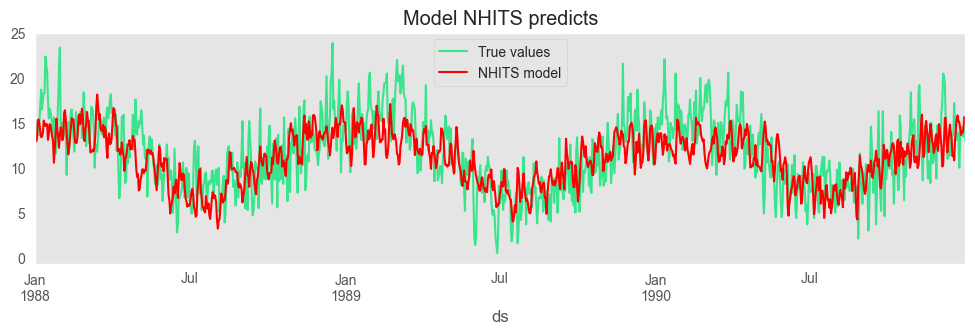

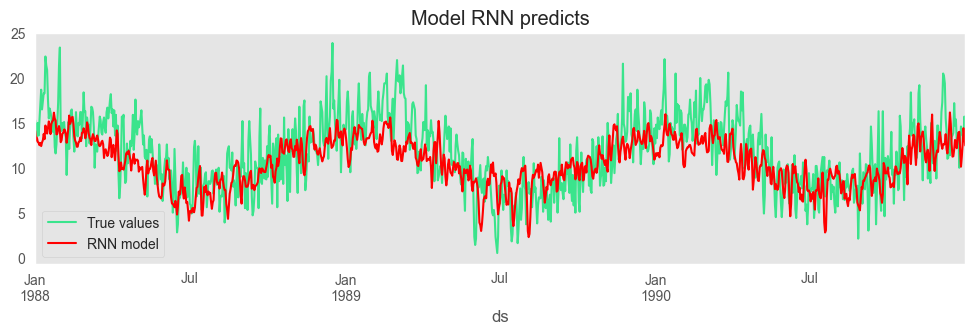

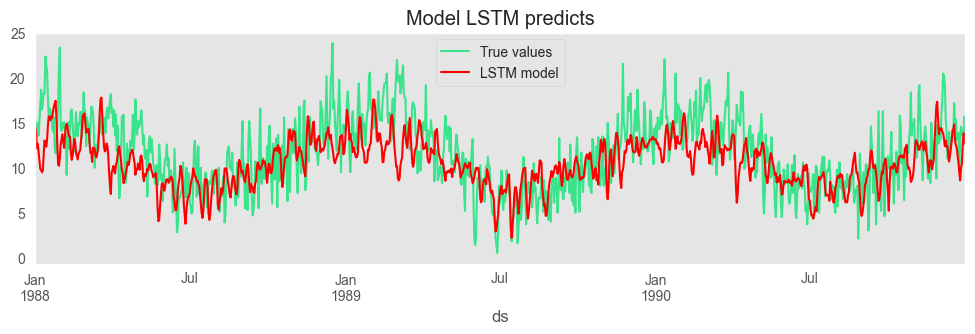

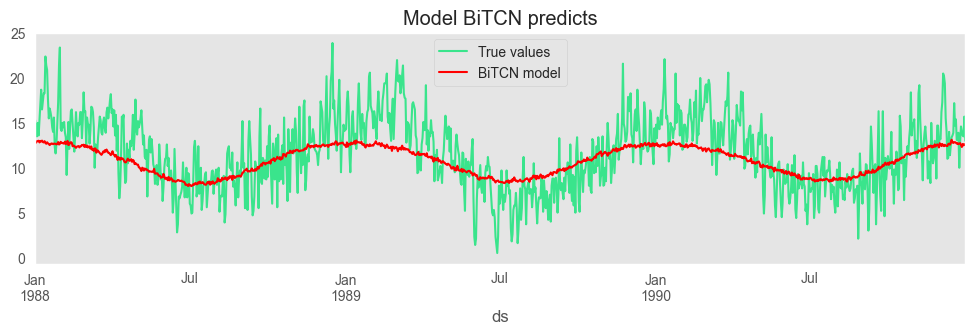

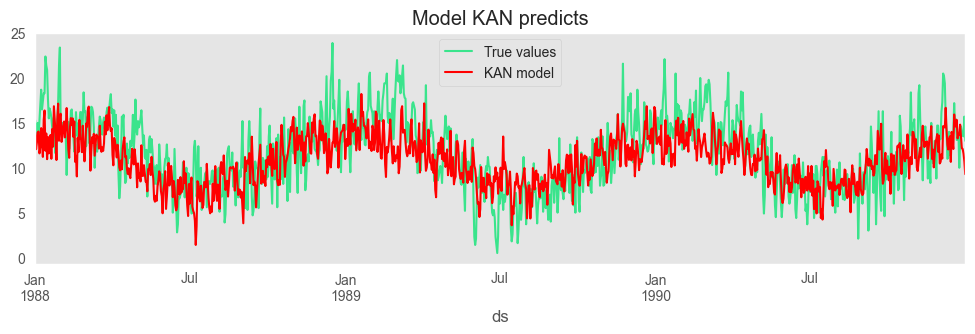

In [86]:
models_ped_plot(y_val, NHITS, 'NHITS')
models_ped_plot(y_val, RNN, 'RNN')
models_ped_plot(y_val, LSTM, 'LSTM')
models_ped_plot(y_val, BiTCN, 'BiTCN')
models_ped_plot(y_val, KAN, 'KAN')

---
## Weekly CO2


---
## Hourly AEP
